In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the provided data
data = pd.read_csv("./data/reports/best_results.tsv",sep="\t")

# Normalize MSE so that higher values are better (for visualization)
data['mse_normalized'] = -data['mse']  # Since lower MSE is better

# Define models and feature selection methods for visualization
models = data['method_name'].unique()
featsel_methods = data['featsel'].unique()


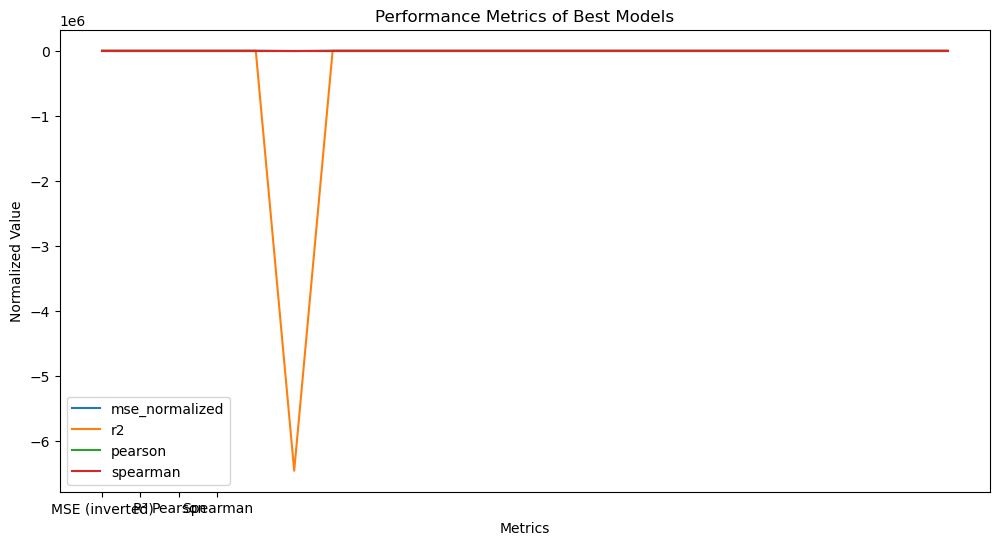

In [3]:
# Set up a figure for parallel coordinates plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data[['mse_normalized', 'r2', 'pearson', 'spearman']], dashes=False)
plt.xticks(range(4), ['MSE (inverted)', 'R²', 'Pearson', 'Spearman'])
plt.title("Performance Metrics of Best Models")
plt.ylabel("Normalized Value")
plt.xlabel("Metrics")
plt.show()

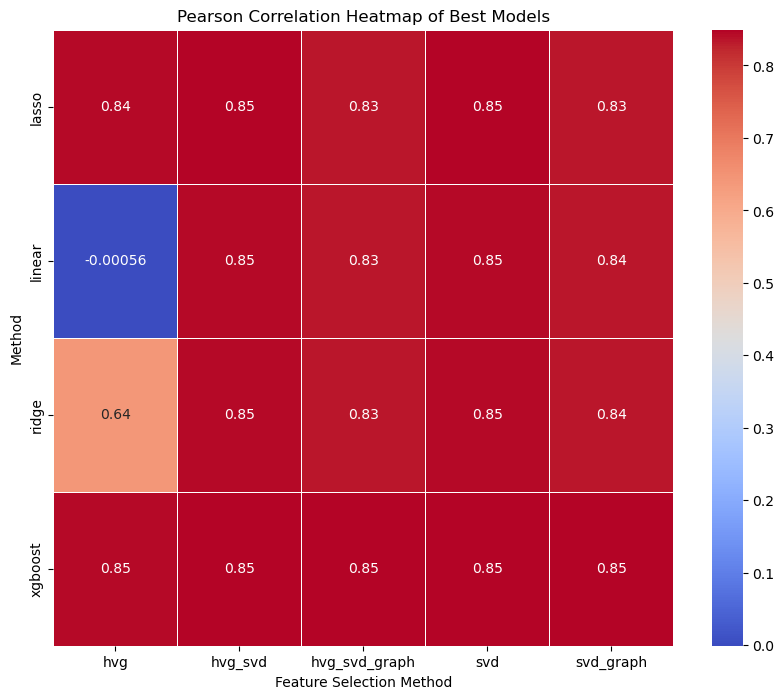

In [4]:
# Set up a figure for heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(
    data.pivot_table(index='method_name', columns='featsel', values='pearson'), 
    annot=True, cmap='coolwarm', linewidths=0.5
)

plt.title("Pearson Correlation Heatmap of Best Models")
plt.ylabel("Method")
plt.xlabel("Feature Selection Method")
plt.show()

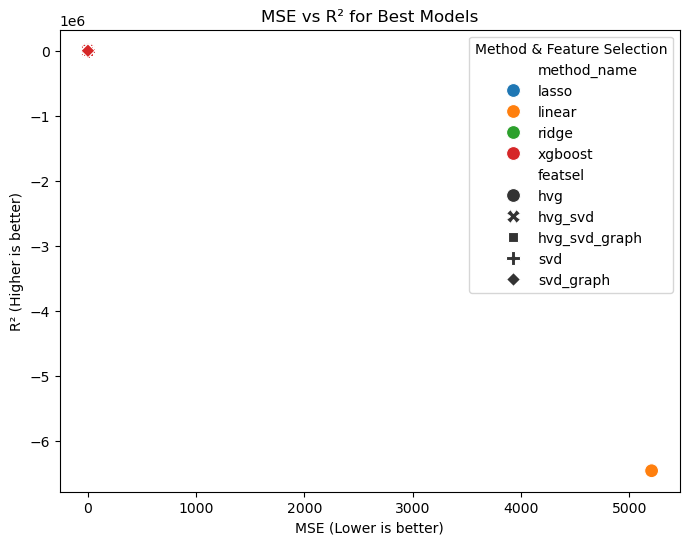

In [5]:
# Set up scatter plot of MSE vs R² to see trade-off
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['mse'], y=data['r2'], hue=data['method_name'], style=data['featsel'], s=100)
plt.xlabel("MSE (Lower is better)")
plt.ylabel("R² (Higher is better)")
plt.title("MSE vs R² for Best Models")
plt.legend(title="Method & Feature Selection", bbox_to_anchor=(1, 1))
plt.show()


In [6]:
# Display the dataframe visually
import ace_tools as tools
tools.display_dataframe_to_user(name="Best Model Results", dataframe=data)

ModuleNotFoundError: No module named 'ace_tools'